# Control 2
Nombre 1: FRANCISCO JAVIER MORALES BARCELÓ                                                                                                                                      <br> 
Nombre 2: _Puede incluir su nombre acá haciendo doble click_   

# Instrucciones

El siguiente test podrá desarrollarlo de manera individual o en pareja con otro(a) de sus compañeros(as).<br>

Lea atentamente cada una de las preguntas propuestas y sea claro en los comentarios (si es que los incluye) de los desarrollos de sus respuestas. Para el desarrollo de las mismas, dispone de celdas de código después de cada pregunta. Sin embargo podrá agregar más celdas si así lo estima conveniente.<br>
Las preguntas formuladas en este test pueden ser abordadas con las herramientas trabajadas en clases, sin embaro, usted podrá hacer uso de las funcionalidades y/o packages que estime convenientes, a menos que se indique explícitamente lo contrario.

## Tiempo y entrega
Dispondrán hasta el día vienres **05 de agosto hasta las 23:59 hrs** para hacer envío de sus respuestas.
Una vez finalizado el desarrollo del test, deberá entregarlo teniendo en cuenta las siguientes consideraciones :

 * Descargue el notebook en **formato `*.ipynb`** (uno por pareja), e indique en el nombre del archivo los nombres de los integrantes, `Contro2_nombres_integrantes.ipynb`. 
 
 * En caso de trabajar en Rstudio, deberá enviar el script de extensión `*.R` con el siguiente nombre: `Control2_nombres_integrantes.R` , **procurando indicar con comentarios claros, qué pregunta está respondiendo en cada caso**.
 * Envíe el archivo al correo rumorale1@gmail.com, con copia a majorquev@gmail.com con el asunto "DBDC-R-C2: 'nombre y apellido de los integrantes' "
 
**NOTA**: 
   * Los correos cuyo asunto no comiencen con "DBDC-R-C2" no llegarán a destino y por ende no serán calificados.
   * Los archivos que no contengan nombre serán calificados con la nota mínima 1.0.
   * Los correos enviados posterior a la fecha y hora de entrega indicados tendrán una penalización de 1 punto por día (o fracción) de retraso en la entrega, por ejemplo, si usted envía sus respuestas a las 00:01 hrs del sábado 06 de agosto, su nota máxima será un 6.0.

# Sección 1

En la ruta `./datasets` se encuentran los siguientes arhivos, correspondiente a un sondeo de distintos restaurants del estado de California (CA) de EE.UU y sus valoraciones.
El archivo `generalinfo.csv` contiene información propia del restaurant, como tipo de comida ofrecida y valoración de los clientes entre otros.

* `id_restaurant`: Identificador del restaurant valorado. 
* `label`: Nombre del restaurant.
* `food_type`: Tipo de comida ofrecida por el restaurant.
* `review`: Calificación promedio del restaurant otorgada por los usuarios. (valor entre 0 y 1)

Por otra parte, la información contenida en el archivo `location.csv` es la siguiente:

* `id_rest`: Identificador del restaurant valorado.
* `street_num`: Numeración de la ubicación del restaurant.
* `street_name`: Nombre de la calle donde está ubicado el restaurant.
* `city`: Ciudad donde se ubica el restaurant.
* `county_name`: Condado.
* `lat`: Latitud de la dirección.
* `lng`: Longitud de la dirección.
Note que ambas tablas están relacionadas a través de los campos `id_restaurant` y `id_rest`.

## Preliminar 
Cargue los archivos indicados previamente en dos variables, una llamada `general` y otra `location` para  `generalinfo.csv` y `location.csv` respectivamente.

In [ ]:
## Carga de archivos
general <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202206_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C2/datasets/generalinfo.csv")
location <- read.csv("https://raw.githubusercontent.com/majorquev/DBDC_202206_Programacion_en_R_para_ciencia_de_datos/main/Evaluaciones/C2/datasets/location.csv")



In [ ]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Preguntas 1.1

**P1a) (1pt)** Basándose en a tabla _general_, ¿cuántos restaurants (id's) distintos hay en total?<br>
**P1b) (1pt)** ¿En cuántos tipos de comida diferentes se clasifican los restaurants?<br>
**P1c) (2pt)** ¿Cuántas ciudades distintas considera el sondeo?<br>
**P1d) (2pt)** ¿Indique el tipo de comida y las ciudades donde se encuentra el restaurant "great wall restaurant"?<br>
**P1e) (2pt)** ¿Cuántos restaurantes de la ciudad de _san francisco_ tienen calificación mayor o igual a 3.8 y venden comida vegetariana (_vegetarian_)?<br>

In [ ]:
# Pregunta 1.a: son 9590 restaurantes distintos

#count(as.data.frame(general$id_restaurant))
general %>%
  count(id_restaurant) %>%
    nrow()

[1] 9590

In [ ]:
# Pregunta 1.b: son 145 tipos de comida diferentes. Si queremos leer los tipos solo hay que "comentar" el comando nrow

general %>% 
    count(food_type) %>% 
      nrow()

[1] 145

In [ ]:
# Pregunta 1.c: son 167 ciudades distintas. Si queremos leer las ciudades solo hay que "comentar" el comando nrow

location %>% 
    count(city) %>% 
      nrow()

[1] 167

In [ ]:
# Pregunta 1.d: 

#primero cambiamos el nombre del id_rest para que podamos hacer left join desde general hasta location
# forma anterior de hacerlo: names(location)[1] <- names(general)[1]

 colnames(location)[1] <- colnames(general)[1]

#ahora el left joint. Haremos un df llamado left1 que una los anteriores

left1 <- general %>%
  merge(location, by = 'id_restaurant', all.x = T)

#Ahora procederemos a mostrar las ciudades donde se encuenta el restaurant "great wall restaurant" y los tipos de comida de cada uno

left1 %>%
  filter(label == "great wall restaurant") %>%
    select(label, food_type, city)

#Con esto vemos que el restaurant se encuentra en San Francisco y San Leandro, y que su tipo de comida es china.
    

label,food_type,city
<chr>,<chr>,<chr>
great wall restaurant,chinese,san francisco
great wall restaurant,chinese,san leandro


In [ ]:
# Pregunta 1.e: 

#primero cambiamos el nombre del id_rest para que podamos hacer right join desde general hasta location

 colnames(location)[1] <- colnames(general)[1]

#ahora el right joint. Haremos un df llamado right1 que una los anteriores, pero esta vez usando la función que permite dplyr

right1 <- general %>%
  right_join(location, by = 'id_restaurant')

#Ahora procederemos a mostrar cuántos restaurantes de la ciudad de san francisco tienen calificación mayor o igual a 3.8 y venden comida vegetariana

right1 %>%
  filter(city == 'san francisco' & review >= 3.8 & food_type == 'vegetarian') %>%
    select(label, city, review, food_type)

#Con esto podemos ver los tres restaurantes que cumplen con las tres condiciones anteriores, 
#pero si solo queremos el número de restaurantes como output, podríamos realizar lo siguiente:

right1 %>%
  filter(city == 'san francisco' & review >= 3.8 & food_type == 'vegetarian') %>%
   # group_by(label) %>%
      count(label) %>% 
        nrow()
   #Aplico el count ya que no puedo suponer que por ciudad solo hay un restaurant con ese nombre (DE AHÍ QUE ESTÉ COMENTADO EL GROUP_BY), 
   #así los agrupo si es que hay más. En este ejemplo no hay más de un restauran con estas características por ciudad (que el mismo restaurant esté dos veces).

label,city,review,food_type
<chr>,<chr>,<dbl>,<chr>
ananda-fuara,san francisco,3.8,vegetarian
millennium,san francisco,3.8,vegetarian
now and zen,san francisco,3.8,vegetarian


[1] 3

## Preguntas 1.2

**P2a) (2pt)** Sin considerar San Francisco, ¿cuál es la ciudad con mayor cantidad de restaurantes sondeados?<br>
**P2b) (1pt)** ¿Cuáles son los 3 tipos de comida ofrecido más comunes ?<br>
**P2c) (2pt)** Sin con siderar San Francisco, ¿Cuáles son las 3 ciudades con mayor cantidad de restaurants que ofrecen comido tipo _japanese_?<br>
**P2d) (2pt)** Usted decide viajar a una de las ciudades en cuestión, para ello calcula el promedio de las valoraciones medias (promedio de _review_) por cada ciudad, y escoje aquella con mayor review promedio. ¿Qué ciudad escoge? <br>
**P2e) (2pt)** Cuál es la ciudad con mejor valoración promedio de restaurantes tipo "barbeque"<br>


In [ ]:
## Respusta 1.2.a: Acá contaremos las ciudades en location (su repetición), 
#filtrando 'san francisco' para que no aparezcan esos resultados al ejecutar el código.
# La respuesta es 'san jose'

location %>% 
  count(city) %>% 
    filter(city != 'san francisco') %>%
      arrange(desc(n)) %>%
        head(1)


,city,n
,<chr>,<int>
1,san jose,933


In [ ]:
## Respusta 1.2.b: Acá realizamos un conteo pero en el df 'general', en donde ordenamos las comidas en orden descendiente
# (según su cantidad de apariciones) y mostramos las 3 más servidas que serían cafe, chinese, y pizza

general %>% 
  count(food_type) %>% 
       arrange(desc(n)) %>%
          head(3)


,food_type,n
,<chr>,<int>
1,cafe,1098
2,chinese,1075
3,pizza,959


In [ ]:
## Respusta 1.2.c: Acá contaremos las ciudades que ofrecen comida japanise usando el df right1, 
#filtrando 'san francisco' para que no aparezcan esos resultados al ejecutar el código.
# La respuesta es 'san jose', 'berkeley', y 'oakland'

right1 %>% 
  count(city, food_type) %>% 
    filter(city != 'san francisco' & food_type == 'japanese') %>%
      arrange(desc(n)) %>%
          head(3)



,city,food_type,n
,<chr>,<chr>,<int>
1,san jose,japanese,28
2,berkeley,japanese,14
3,oakland,japanese,14


In [ ]:
## Respusta 1.2.d: Acá emplearemos dos nuevos df: aux1 - que contiene los nombres de las tres ciudades, y aux2 que 
# además de los nombres tiene también los review (su promedio). Luego es solo ordenar de mayor a menor los promedios y obtener
# el primero de la lista. De igual forma dejo aux2 para que se puedan comparar los 3 promedios (columna llamada prm)
# Con todo esto, la ciudad escogida es berkeley

aux1 <- right1 %>% 
  count(city, food_type) %>% 
    filter(city != 'san francisco' & food_type == 'japanese') %>%
      arrange(desc(n)) %>%
          head(3)

aux2 <- right1 %>% 
  select(city, review) %>%
    filter(city == aux1$city) %>%
      group_by (city) %>%
        summarise (prm = mean(review)) %>%
          arrange(desc(prm))

aux2

head(aux2,1)
      
   



Warning message in city == aux1$city:
“longer object length is not a multiple of shorter object length”


city,prm
<chr>,<dbl>
berkeley,2.489916
san jose,2.208544
oakland,2.174336


city,prm
<chr>,<dbl>
berkeley,2.489916


In [ ]:
## Respusta 1.2.e: Acá podemos realizar un conteo por ciudad, food_type, y el review asociado de cada local 
# filtrando respecto al tipo de comida solicitado, en este caso es 'barbeque'. Ya con esto definido
# procedemos a agrupar resultados por ciudades y luego calcular el promedio de sus reviews, ordenando los resultados
# de mayor a menor y devolviendo el primero de la lista. Con esto, la ciudad resultante es "pleasant hill"

right1 %>% 
  count(city,food_type, review) %>% 
    filter(food_type == 'barbeque') %>%
      group_by (city) %>%
        summarise (prm = mean(review)) %>%
          arrange(desc(prm)) %>%
            head(1)

city,prm
<chr>,<dbl>
pleasant hill,3.7


##Preguntas 1.3

**P3a) (4pt)** En la pregunta 1d), se pudo observar que un mismo restaurant puede estar presente en más de una ciudad. ¿Cuántos restaurants tienen esta característica, es decir están en más de una ciudad **distinta** ? De ser de utilidad puede investigar y utilizar la función `distinct()`.<br>

In [ ]:
# Respusta 1.4.a: Creamos un nuevo df llamado aux3 que contiene el listado de locales que no se repitan dentro de una misma ciudad

aux3 <- left1 %>% 
  distinct(label, city) %>%
#luego agrupamos por los restaurantes que quedan, y contamos sus repeticiones ya que sabemos que serán de ciudades diferentes
              group_by (label) %>%
                  count(label) %>%
                       arrange (desc(n))

#por último solo queda aplicar el filtro en donde n>1 (lo que implica que el restaurant está en más de una ciudad)
aux3 %>% 
  filter (n>1) %>%
    nrow()

#Con esto nos da que tenemos 559 restaurantes que se encuentran en, al menos, dos ciudades


[1] 559

**NOTA:** Si bien no es parte del objetivo de este taller, en ocasiones es necesario depurar la información obtenida a modo de trabajar con datos consistentes. En este análisis, en la tabla general, existen nombres de restaurantes que se peuden escribir de distinta manera (incluso con faltas de ortografía), por ejemplo:

> Bloc con sangría



  * `"1/4 pound giant burger"` y  `"1/4 pound giant burgers"`
  * `"3.6.9. shanghai restaurant"` y `"3 6 9 shanghai restaurant"`
  * `"zorba's pizza"` y `"zorbas pizza"`

Casos como estos existen muchos en nuestra tabla, pero para nuestros efectos **consideraremos como nombres distintos a aquellos casos como los mencionados anteriormente**.

Una manera de abordar este tipo de inconsistencias es necesario en muchos casos la inclusión de diccionarios y de herramientas que nos permitan manipular texto, e incluso medir el nivel de similitud entre frases.

A modo de ejemplo, se pueden eliminar los puntos, apóstrofes, guiones y otros caracteres de la siguiente manera:

````````
general %>%
    mutate(label = tolower(label)) %>% # se deja todo en minúsculas
    mutate(label = gsub("'","", label)) %>% # se reemplaza "'" por ""  
    mutate(label = gsub(" ","_",label)) %>% # se reemplazan los espacios " " por "_"
    mutate(label = chartr("áéíóú", "aeiou", label)) %>% head() # se eliminan las tildes
````````

De ser de interés, pueden obtener más info sobre manipulación de textos y modelamiento en la siguiente referencia [https://www.tidytextmining.com/](https://www.tidytextmining.com/).<br>
Package para medir similitud entre **palabras**: `stringdist`

<br>


**P3b) (2pt)** ¿Cuál es el restaurant que tiene presencia en la mayor cantidad de **ciudades distintas**?¿En cuántas ciudades está presente?<br>

In [ ]:
# Respusta 1.4.b: Como ya habíamos creado un df llamado aux3 con esa información, ordenado de manera descendente por la cantidad de ciudades en las 
# que el restaurante está presente, es cosa de hacer un head(1) para extraer la información o de filtrar por el máximo valor de la columna n

#forma 1
aux3 %>% head(1)
#forma 2
aux3 %>%  filter(n == max(aux3$n))

#La respuesta es Baskin Robbins, con presencia en 49 ciudades diferentes!!!


label,n
<chr>,<int>
baskin robbins,49


label,n
<chr>,<int>
baskin robbins,49



**P3c) (5pt)** Diremos que un restaurant posee _sucursales_ si en la tabla `general` existe más de un registro con el mismo `label`. Muestre, mediante un gráfico de barras, los 15 restaurants con  mayor cantidad de _sucursales_, donde la altura de la barra representa el total de sucursales de cada restaurant. Su gráfico debe contemplar al menos los siguientes aspectos:
 * Debe contener un título.
 * Debe incluir nombres sugerentes en los ejes.
 * Los nombres de los restaurants deben ser legibles.
 * Los restaurants deben ir ordenados según su cantidad de sucursales.
 * Incluya tiquetas en la parte superior de cada barra, que muestre la cantidad de sucursales respectivas.
 * Las leyendas de cada gráfico no deben visualizarse
 
Como ayuda, puede ser de utilidad investigar la usabilidad de las siguientes funciones de ggplot2.
  * `labs()`: Para la inclusión de nombres en los ejes, títulos, leyenda etc.
  * `geom_label()`; `geom_text()`: para añadir etiquetas esobre las gráficas.
  * `reorder()`: Para reordenar una variable en la función `aes()`.
  * `coord_flip()`: Para invertir ejes.
  * `theme()` en conjunto con `element_text()`: Permite modificar el tema de visualización. Por ejemplo, la siguiente instrucción muestra las etiquetas del eje x con una orientacíón en 45 grados respecto de la posición original:

  ````````
grafico_ggplot +
    theme(axis.text.x=element_text(angle = 45, vjust = .5,hjust = 1))

In [ ]:
# P1.3.c: Primero cargamos la librería
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#Ahora procedemos a generar el df del cual se extraerá la información para crear el gráfico,
# lo cual es agrupar por label, contar sus repeticiones, ordenarlas de manera descendente
# y obtener las 15 primeras apariciones.

graf1 <- general %>%
    group_by (label) %>%
                  count(label) %>%
                       arrange (desc(n)) %>%
                          head(15)

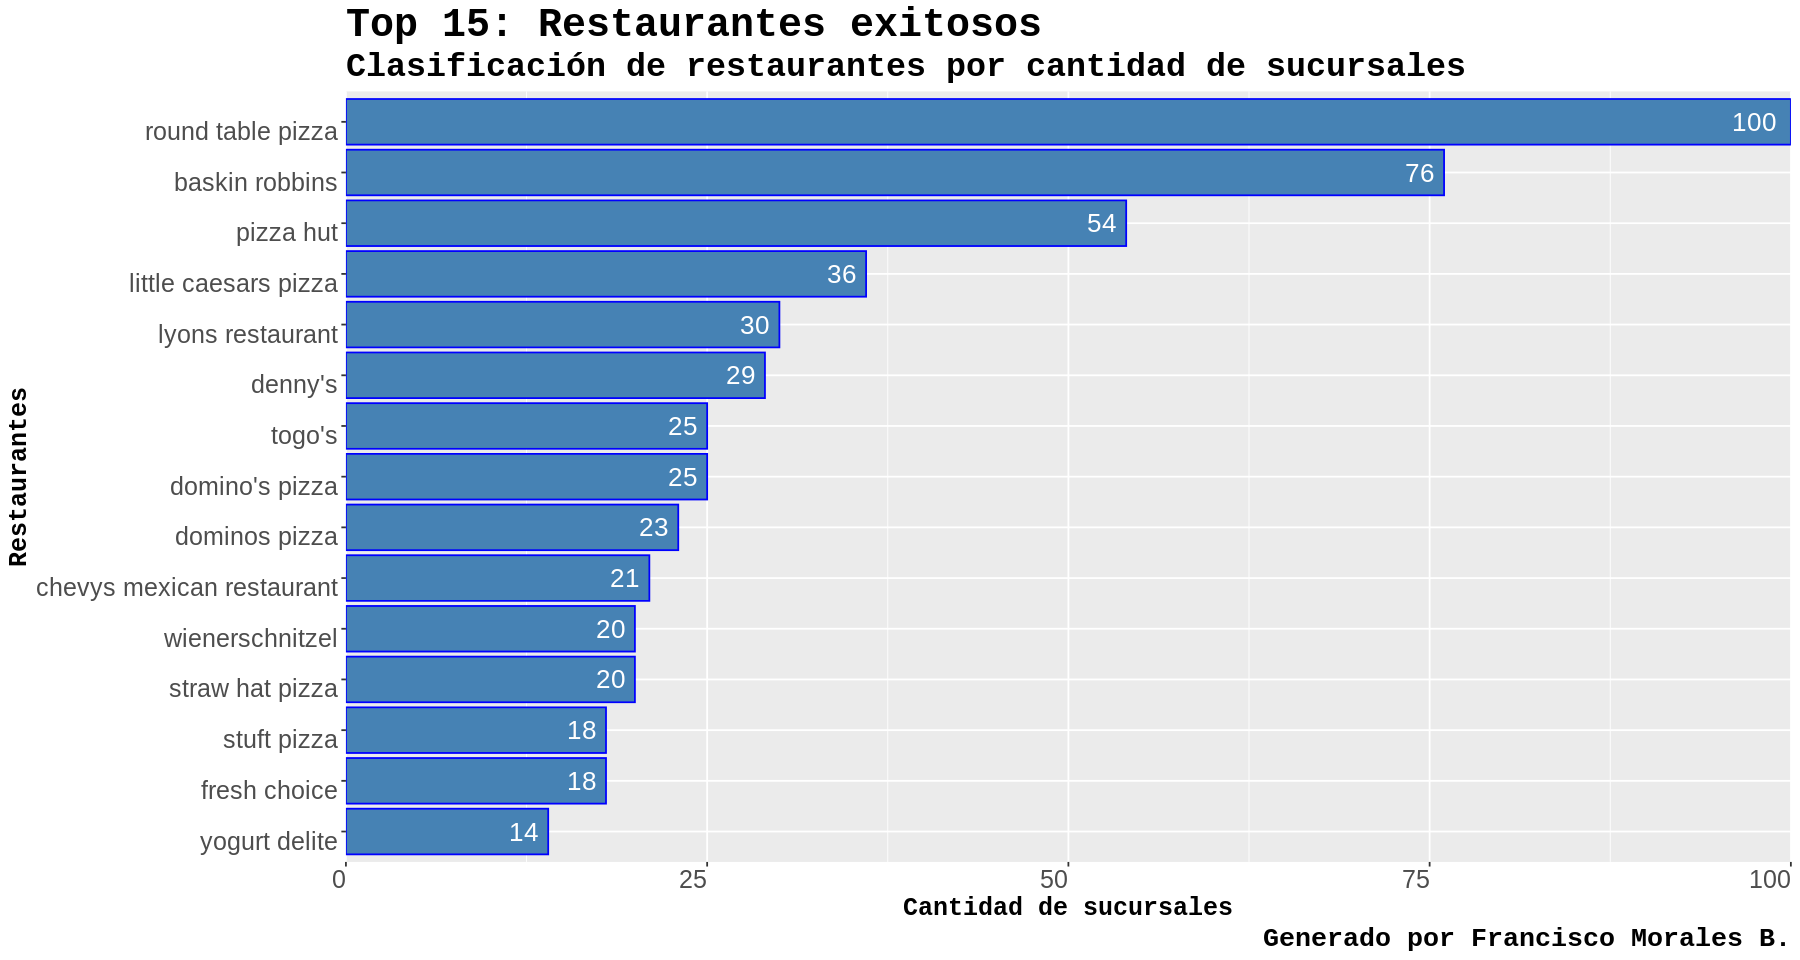

In [ ]:
#Ahora procedemos a generar el gráfico solicitado:
graf1 %>% ggplot () + 
#reordenamos el gráfico respecto a la cantidad de sucursales
  aes (x = reorder(label, n), y = n) + 
#hacemos el gráfico de barra con color azul
    geom_bar(stat="identity", color="blue", fill = "steelblue") +
#Damos los parámetros a los textos del gráfico (etiquetas dentro de las barras)
      geom_text(aes(label= n), hjust= 1.3, color="white", size=5.5)+
#Damos los parámetros a los textos del gráfico (titulos, subtítulos, pie de gráfico) y les damos formato para que resalten
        labs(title='Top 15: Restaurantes exitosos', 
          subtitle='Clasificación de restaurantes por cantidad de sucursales', 
             caption='Generado por Francisco Morales B.')+
                theme(title = element_text(family='Anton', face='bold', size= 20) )+
#Cambiamos el nombre de los ejes para que sean sugerentes y los dejamos con otra fuente, más grandes y en negrita            
                  xlab('Restaurantes') +
                      ylab('Cantidad de sucursales')+
                          theme(axis.title.x = element_text(family='Anton', face='bold', hjust=0.5, size= 15) )+
                              theme(axis.title.y = element_text(family='Anton', face='bold', size= 15) )+
#Damos corrección a los textos de los ejes para que se vean correctamente (nombre de los restaurantes y cantidad de sucursales)
                        theme(axis.text.x=element_text(angle = 0, vjust =1,hjust = 1, size = 15))+
                          theme(axis.text.y=element_text(angle = 0, vjust =1,hjust = 1, size = 15))+
#Y por último indicamos que invierta su presentación y que adecue sus límites dentro del espacio del gráfico
                                   coord_flip() +
                                     scale_y_continuous(expand = expansion(mult = c(0, 0)))
                                      
#Luego de tener el gráfico listo lo que realizamos es permitir su reproducción en un tamaño mayor para no tener dificultades de lectura                                     
options(repr.plot.width=18, repr.plot.height=10)


## Preguntas 1.4

**P4a) (4pts)** Genere una tabla llamada `resumen`, que contenga la siguiente información:

 * `city`: Ciudad
 * `food_type`: Tipo de comida
 * `n_rest`: Cantidad de restaurantes por cada ciudad y tipo de comida.
 * `review_prom`: Valoración promedio por cada ciudad y tipo de comida.
 * `total_rest`: Total de restaurantes por cada ciudad (se puede repetir el valor por cada tipo de comida).
 * `review_prom_city`: Valoración promedio de los restaurantes por cada ciudad (se puede repetir el valor por cada tipo de comida).

Su tabla deberá tener la siguiente estructura (la imgen sólo muestra los primeros registros):

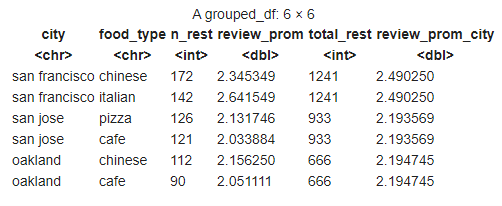

In [ ]:
#Respuesta 1.4.a: Iniciamos creando un df auxiliar p1 que nos permita agrupar por ciudades y mostrar un resumen de la suma de los restaurantes que hay por 
# cada ciudad (que es contar la repetición de veces de aparición de la ciudad, o sea n() )
p1 <- left1 %>% 
 group_by(city) %>%
    summarise(total_rest = sum(n())) %>%
       arrange(desc(total_rest))

In [ ]:
#luego creamos un segundo df auxiliar el cual contenga la información agrupada por las variables city y food_type, con lo cual 
#agregamos al resumen las columnas que indiquen la cantidad de restoranes que realizan cierto tipo de comida en esa ciudad (sumar la cantidad de apariciones)
# más una columna que entregue el promedio de los reviews agrupados por las variables ya mencionadas.
p2 <- left1 %>% 
  group_by(city, food_type) %>%
    summarise(n_rest = sum(n()),review_prom = mean(review) ) %>%
      arrange(desc(n_rest)) 

`summarise()` has grouped output by 'city'. You can override using the
`.groups` argument.


In [ ]:
#armamos otro df auxiliar que sea el joint entre los anteriores, uniéndolos por la variable city, y respetando el orden de columnas solicitado
p3 <- p2 %>% left_join(p1, by = "city")

In [ ]:
#Generamos el ultimo df auxiliar para obtener la columna que entregue los reviews promedio por ciudad, AGRUPANDO SOLAMENTE POR CIUDAD
p4 <- left1 %>% 
 group_by(city) %>%
    summarise(review_prom_city = mean(review)) %>%
       arrange(desc(review_prom_city ))

In [ ]:
#y para concluir generamos el df resumen que contiene la unión entre los últimos df auxiliares a través de la variable city
resumen <- p3 %>% left_join(p4, by = "city")




**P4b) (2pts)** Basado en la tabla anterior, construya dos nuevas columnas llamadas `density_food_type` y `ratio_review` que contengan la siguiente información:
 
 * `density_food_type`: Representa el cuociente entre le total de restaurants por tipo de comida y ciudad, respecto del total de restaurantes de la ciudad. (`n_rest/total_rest`)
 * `ratio_review`: Representa el cociente entre a valoración del restaurant por tipo de comida y ciudad, respecto de la valoración promedio de los resturants de la misma ciudad. (`review_prom/review_prom_city`)
 


In [ ]:
## Respusta 1.4.b: Construiremos un nuevo df llamado res1 para guardar las nuevas dos columnas a agregar con mutate()

res1 <- resumen %>%
  mutate(density_food_type = n_rest/total_rest, 
            ratio_review = review_prom/review_prom_city)


In [ ]:
#Y acá, para avanzar hacia las preguntas de la sección 1.5, guardaremos los cambios en resumen

resumen <- res1

**P4c) (3pts)** Mediante un gráfico de dispersión, muestre la relación entre `density_food_type` y `ratio_review`. Investigue sobre el parámetro `alpha` dentro de la capa geométrica para una mejor visualizaciónd de los puntos. Adicionalmente añada una curva de tendencia y, con base en él, indique si cabe la posibilidad de establecer algún tipo de dependencia entre `density_food_type` y `ratio_review`.


`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



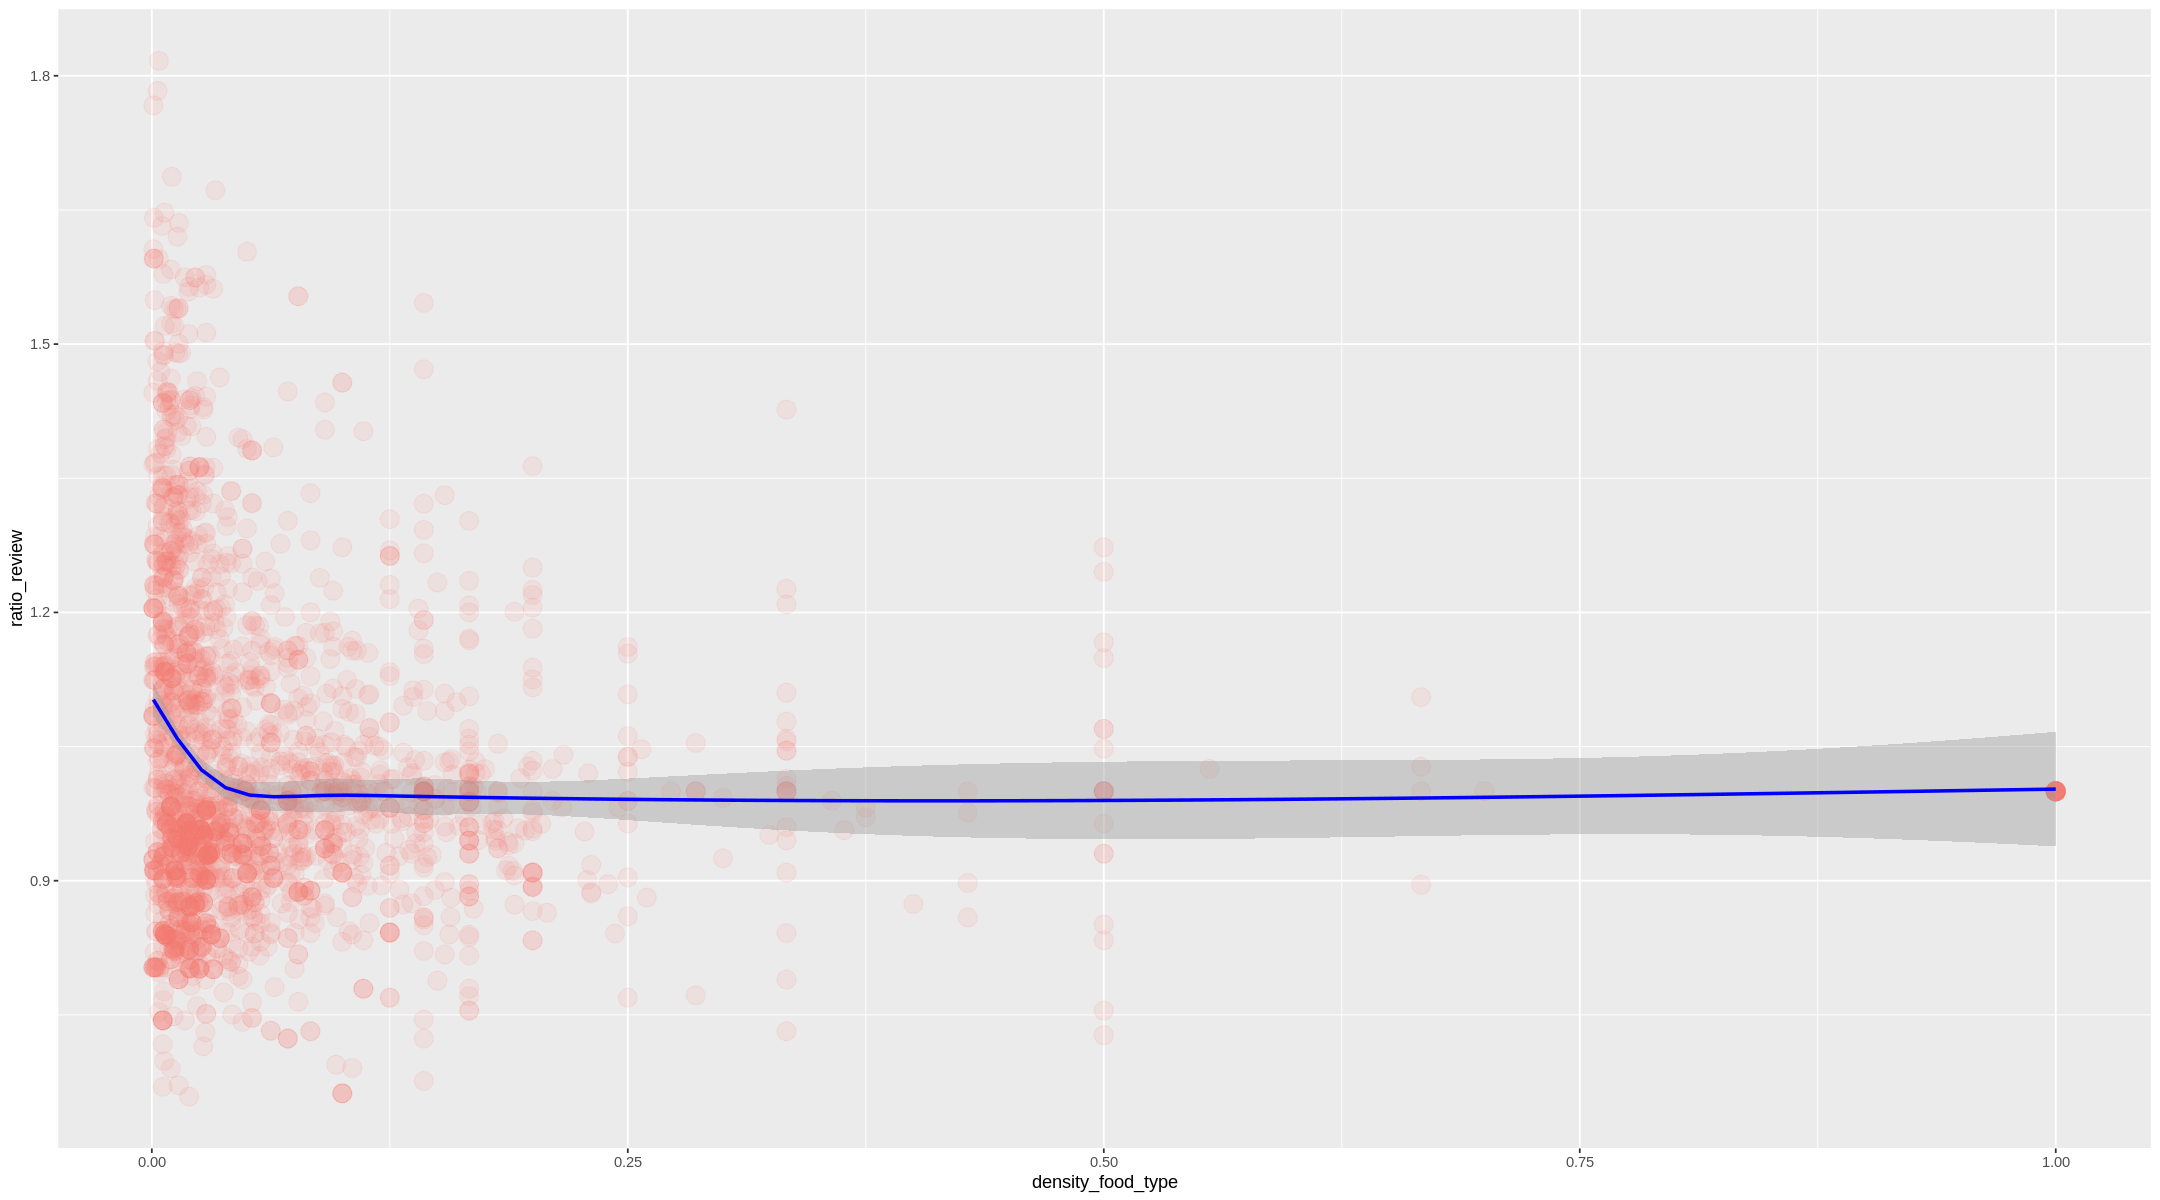

In [ ]:
#Respuesta 1.4.c: 

resumen %>%   ggplot() +
  aes(x = density_food_type, y = ratio_review, colour = "red") + 
    geom_point(alpha = 0.1, show.legend = F,size = 5) +
      geom_smooth(colour = "blue")

options(repr.plot.width=18, repr.plot.height=10)

# Con esto es posible apreciar que la curva de tendencia aplicada, y que más se ajusta al comportamiento de los datos, es de tipo cúbica (bs = "cs"), 
#pero basta considerar el alto grado de dispersión de los datos alrrededor de la curva de tendencia (sobretodo para valores por sobre los 0.25 
#de density_food_type) para inferir que el comportamiento #observado no correspondería en su mayoría al comportamiento esperado según esta curva
#salvo en su inicio.

#Como observación final podemos decir que, debido a que la acumulación de puntos se encuentra mayoritáriamente
#entre 0.00 y 0.25 para valores de density_food_type, mientras más tipos de comida se sirvan por ciudad (por ende 
# más restaurantes distintos, lo que implica un bajo density_food_type) habrá mayor variación de reviews, por lo que
# también el ratio de estos reviews será más diverso (por ende disperso entre estos rangos del eje x)    

## Preguntas 1.5
**P5a) (3pts)** En la tabla `resumen` creada en **P4a)**, genere una nueva columna llamada `type_review`, que contenga "review alto", si `ratio_review >= 1` y "review bajo"  `ratio_review < 1`. ¿Qué indica esta variable? Comente.  <br>


In [ ]:
# P1.5.a Respusta: creamos con mutate la columna solicitada, aplicando ifelse para determinar cuando es review alto o bajo

res2 <- resumen %>%
  mutate(type_review = ifelse(ratio_review >= 1, "review alto", "review bajo"))

head(res2, 5)

# Un review alto indica que la valoración de los restaurantes que sirven cierto tipo de comida en una ciudad particular es mayor a la 
# valoración promedio de los restaurantes de la ciudad. En cambio un review bajo nos muestra que la valoración de los restaurantes 
#que sirven cierto tipo de comida en una ciudad específica es menor a la valoración promedio de los restaurantes de la ciudad.

#En resumen, si el review es alto el restaurant esta por sobre el promedio no importando el tipo de comida, y si
#el review es bajo, el restaurant esta por debajo del promedio general de la ciudad.


city,food_type,n_rest,review_prom,total_rest,review_prom_city,density_food_type,ratio_review,type_review
<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>
san francisco,chinese,172,2.345349,1241,2.490250,0.1385979,0.9418127,review bajo
san francisco,italian,142,2.641549,1241,2.490250,0.1144239,1.0607568,review alto
san jose,pizza,126,2.131746,933,2.193569,0.1350482,0.9718162,review bajo
san jose,cafe,121,2.033884,933,2.193569,0.1296892,0.9272032,review bajo
oakland,chinese,112,2.156250,666,2.194745,0.1681682,0.9824605,review bajo


**P5b) (3pts)** Para cada `type_review`, muestre a través de un gráfico de cajas (boxplot), la distribución de la densidad del tipo de comida`density_food_type`. ¿Qué puede observar?<br>

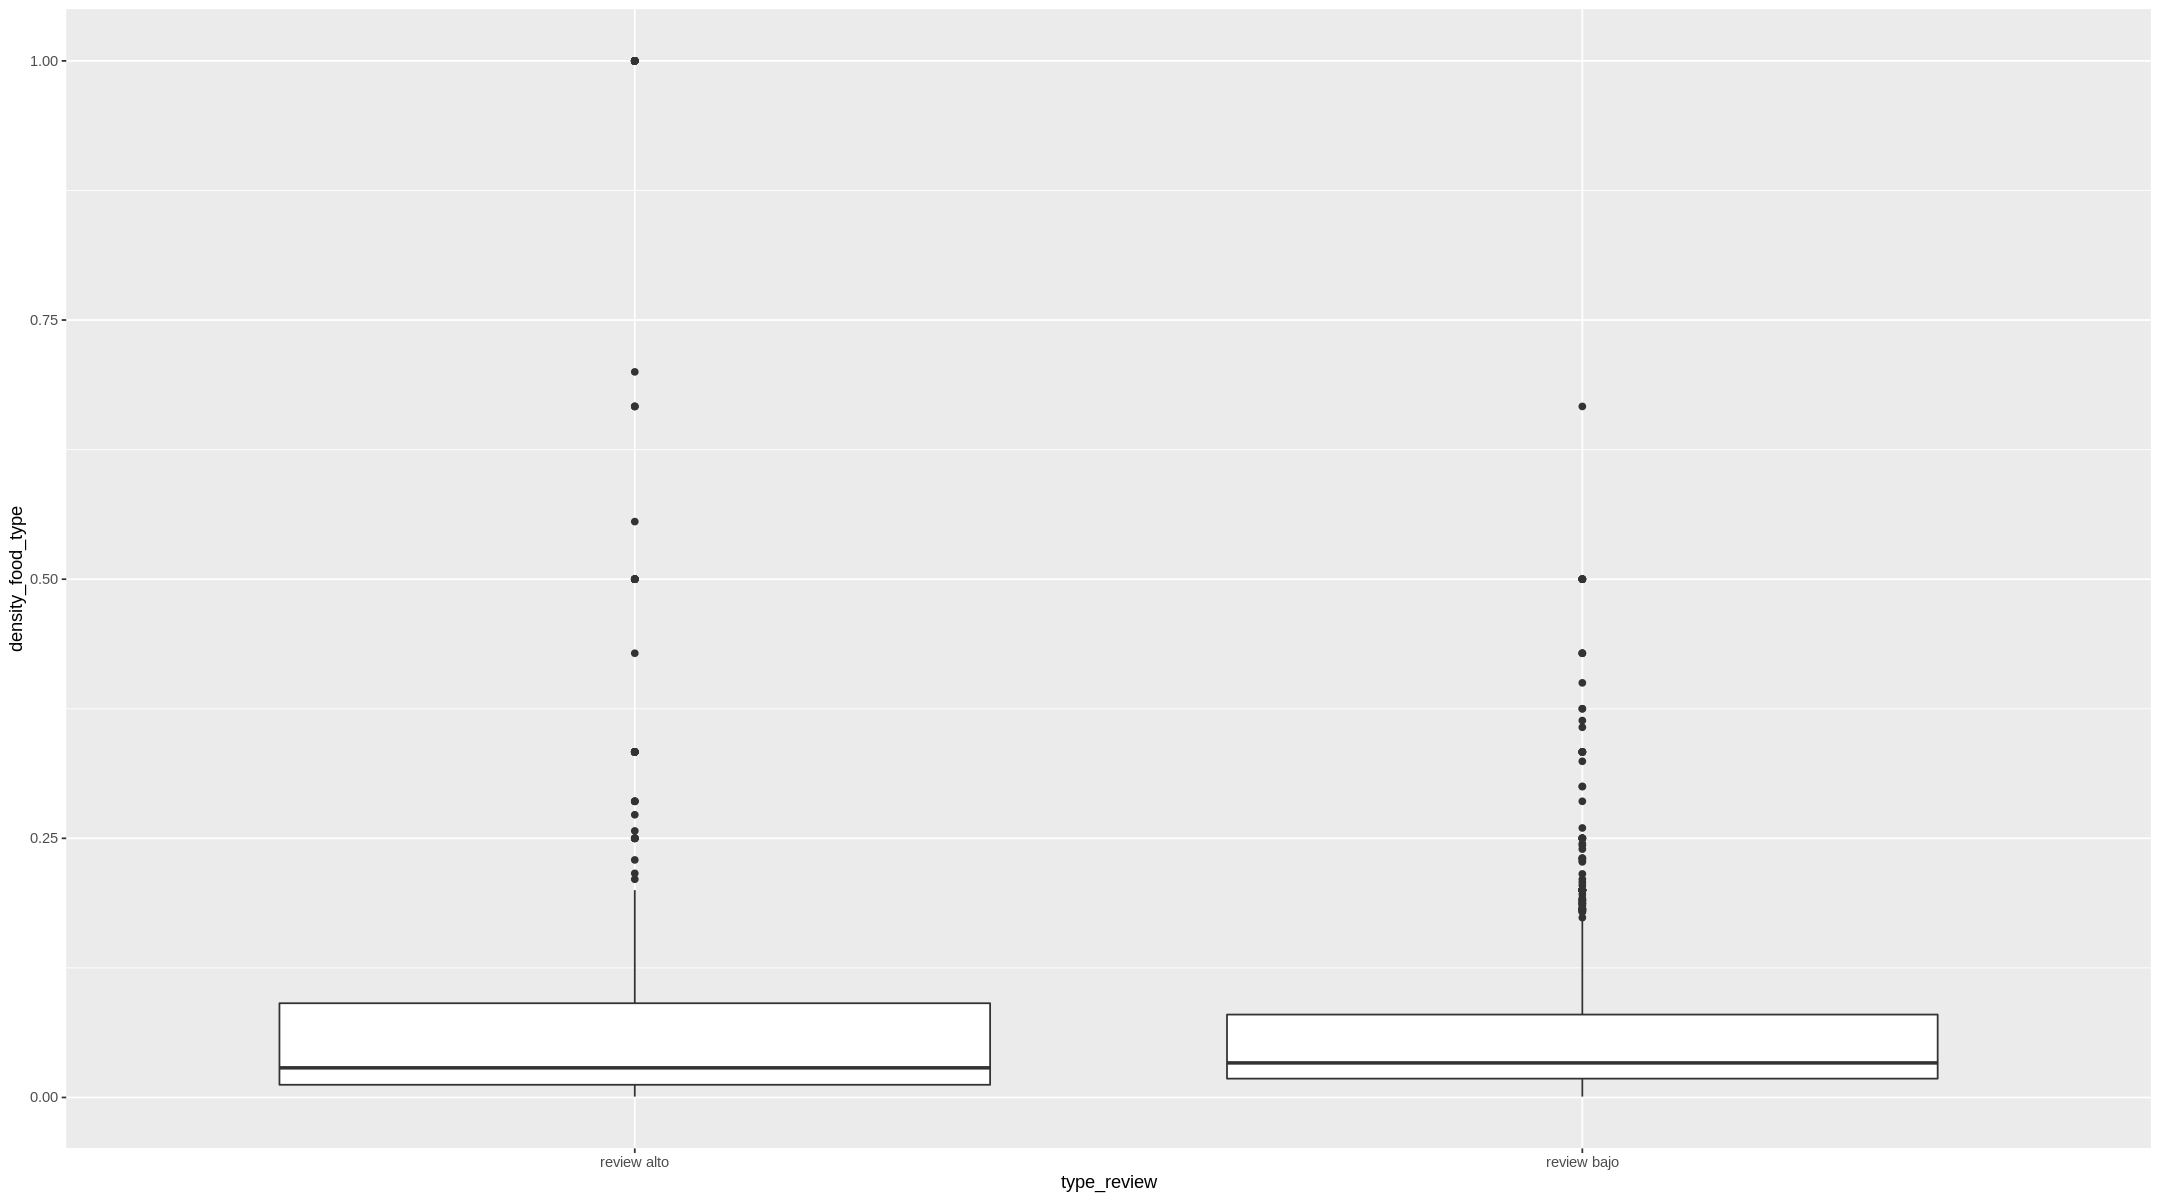

In [ ]:
# P1.5.b Respuesta:

res2 %>% ggplot() +
  aes(x = type_review, y = density_food_type )+
    geom_boxplot()

options(repr.plot.width=18, repr.plot.height=10)

#Podemos observar que, para cada tipo de review, se tienen los siguientes efectos:

# 1.- el 50% de nuestra muestra (rango intercuantílico de density_food_type segun los tipos de reviews) se encuentra entre valores de density_food_type 
#(en adelante dft) desde 0.00 hasta 0.125 (primera franja horizontal gris inferior del gráfico). 

#2.- El 100% de valores de dft, que no son outlayers, se encuentran bajo un valor de dft = 0.25
# no importando el tipo de review que se tenga

#3.- En ambos tipos de reviews vemos que la mayor dispersión de datos ocurre pasado su mediana
# (linea divisoria de cada caja). Esto se aprecia debido a que sobre la mediana se tiene una mayor
# proporción de la caja que bajo la misma.

#4.- Debido al tamaño de los bigotes de cada caja, vemos que hay outlayers que se encuentran muy
# disparados respecto al comportamiento general de cada muestra 
